### 선 굵기 변경


In [ ]:
options(warn=-1,scipen=100)
par(bg='white')
x <- c(1,3,5,2,9,10)
plot(x,
    type='b',
    col=c('red','blue'), # indexr기준
    lwd=3, # line width
)

### 한 화면에 차트 여러개 그려서 비교하기

In [ ]:
price <- runif(10,1,100)
par(bg='white')
plot(price)

In [ ]:
# 2행 2열 차트 그리기(4분할 차트)
par(mfrow=c(2,2),bg='white')
plot(price,type='l')
barplot(price)
pie(price)
plot(price,type='s')

In [ ]:
# 2행 2열 차트 그리기 : type 속성으로 구분해보기
par(mfrow=c(2,2),bg='white')
plot(price,type='l')
plot(price,type='o')
plot(price,type='h')
plot(price,type='s')

In [ ]:
# 2행 2열 차트 그리기 : pch 속성으로 구분해보기
par(mfrow=c(2,2),bg='white')
plot(price,type='o',pch=5)
plot(price,type='o',pch=15)
plot(price,type='o',pch=25,col='blue')
# 특정 포인트를 강조하고 싶을때! 벡터를 이용
plot(price,type='o',pch=c(rep(15,8),20,20),col='orange',cex=c(rep(1,8),3,1))

### 중첩자료 시각화

In [ ]:
x <- c(1,2,3,4,2,4)
y <- rep(2,6)

In [ ]:
par(bg='white')
plot(x,y)

In [ ]:
# 1
xy.df <- as.data.frame(table(x,y))
xy.df
par(bg='white')
plot(x,y,
    pch=15,
    cex=2*xy.df$Freq # 벡터화
)

In [ ]:
# 2
x <- c(1,1,1,2,2,2,2,2,2,3,3,4,5,6)
y <- c(1,1,4,2,3,2,2,2,3,2,1,1,1,1)

z <- data.frame(x,y); z
sunflowerplot(z)

In [ ]:
par(bg='white')
sunflowerplot(iris$Sepal.Length,iris$Sepal.Width)

### chart 2개를 겹쳐서 출력하기

In [ ]:
x <- 1:10
myCol <- rgb(1,0,0,seq(0.1,1,0.1))# rgb(red,green,blue,투명도), 벡터값으로 표현할 수 있음

par(bg='white')
dotchart(x,col=myCol)
par(new=T) # 두 그래프 사이에 위치시켜야 합쳐진다
barplot(x, col=myCol)

### 상자수염 그래프(이상치 확인)

In [ ]:
abc <- c(110,300,150,280,310)
par(bg='white')
boxplot(abc) # summary 값과 유사 : 최소, 1/4, 중앙, 평균, 3/4, 최대
summary(abc)

In [ ]:
par(bg='white')
boxplot(abc,
    col=myCol,
    horizontal=T
)

In [ ]:
def <- c(1,1,1,1,1,2,5)
summary(def)
par(bg='white')
boxplot(def) # 동그라미가 이상치이다.

### 자동차의 제동거리

In [ ]:
head(cars)

In [ ]:
str(cars)

In [ ]:
par(bg='white')
plot(cars)

In [ ]:
par(bg='white')
hist(cars$dist)

In [ ]:
par(bg='white')
boxplot(cars$dist)

In [ ]:
# 특이치는 많이 벗어나지 않은 이상치(3사분위~4사분위 간격만큼만)
par(family="AppleGothic",bg='white')

# 기타 그래프
x <- c(1,3,6,8,9)
y <- c(12,56,78,32,9)

plot(x,y)

# 선분 그리기 : (3,3)와 (4,4) 연결
segments(6,78,8,32,col='red')

# 화살표 그리기
arrows(3,56,1,12,col='blue') # 시작과 끝 좌표를 잘 입력해야한다.

# 사각형 그리기
rect(4,20, 6,30, col='green',border='red',density=30)

# 글자 쓰기
text(4,60, 'this is a sample', col='skyblue', srt=90) # srt : 회전

# 테두리 활용하기
mtext("character", side=4, adj=0.5) # side : x축부터 1, y축 2, 윗면 3, 우측면 4, adj : 위치

# chart의 테두리 그리기
box(lty=1, col='green')

# x축 추가 : y축의 40 위치에 0~10 표시하고 색은 빨강
axis(1, pos=40, at=0:10, col='red')

# y축 추가 : x축의 6 위치에 20~60 표시하고 색은 파랑
axis(2, pos=6, at=20:60, col='blue')

In [ ]:
election <- read.csv('../data/election_2017.csv')

In [ ]:
head(election)
library(dplyr)
elect1 <- head(arrange(election,desc(pop)),5)
colnames(elect1[,4:7]) <- c('투표수','문재인','홍준표','안철수')
elect1

In [ ]:
elect1m<-t(as.matrix(elect1[,5:7]))
colnames(elect1m) <- paste(elect1$광역시도,elect1$시군)
rownames(elect1m) <- c('문재인','홍준표','안철수')
elect1$합계 <- apply(elect1[1:5,5:7], 1, sum)
elect1m

In [ ]:
par(family='AppleGothic',bg='white')
barplot(elect1m,
    legend.text=T,
    main='투표수 높은 지역의 후보별 투표수',
    ylim=c(0,500000),
    col=c('skyblue','red','lightgreen'),
    cex.names=0.7,
)
# 간격이 0.2라는 점을 이용
for(j in 1:ncol(elect1m)){
    text(0.7+(j-1)*1.2,apply(elect1m[,1:5] , 2, sum)[j]+10000,apply(elect1m[,1:5],2,sum)[j])
}
# for문 1개
    #text(0.7+(i-1)*1.2, elect1m[1,i]/2, paste(round(elect1m[1,i]/elect1$합계[i]*100,2),'%'))
    #text(0.7+(i-1)*1.2, elect1m[1,i]+elect1m[2,i]/2, paste(round(elect1m[2,i]/elect1$합계[i]*100,2),'%'))
    #text(0.7+(i-1)*1.2, elect1m[1,i]+elect1m[2,i]+elect1m[3,i]/2, paste(round(elect1m[3,i]/elect1$합계[i]*100,2),'%'))
# 이중 for문 
for(i in 1:ncol(elect1m)){
    for(j in 1:nrow(elect1m)){
        # y축 좌표, 1~j 까지의 득표수를 합한것에서 j번째 득표수의 절반을 뺀다. 그러면 1~j-1 까지의 득표수 합 + j번째 가운데 높이의 좌표가 구해진다.
        text(0.7+(i-1)*1.2, sum(elect1m[1:j,i]) - elect1m[j,i]/2,paste(round(elect1m[1,i]/elect1$합계[i]*100,2),'%'))
    }
}

In [3]:
install.packages("Rcpp")


Warning message in install.packages("Rcpp"):
“installation of package ‘Rcpp’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [27]:
library(ggplot2)

ERROR: Error in library(ggplot2): there is no package called ‘ggplot2’


# 수학 함수의 시각화
y = x^2

In [5]:
f <- function(x){
    y = x^2
    return(y)
}

In [19]:
x <- seq(-5,5,0.1)
head(f(x))

[1] 55.41316 45.04978 35.95042 27.98717 21.04432 15.01713

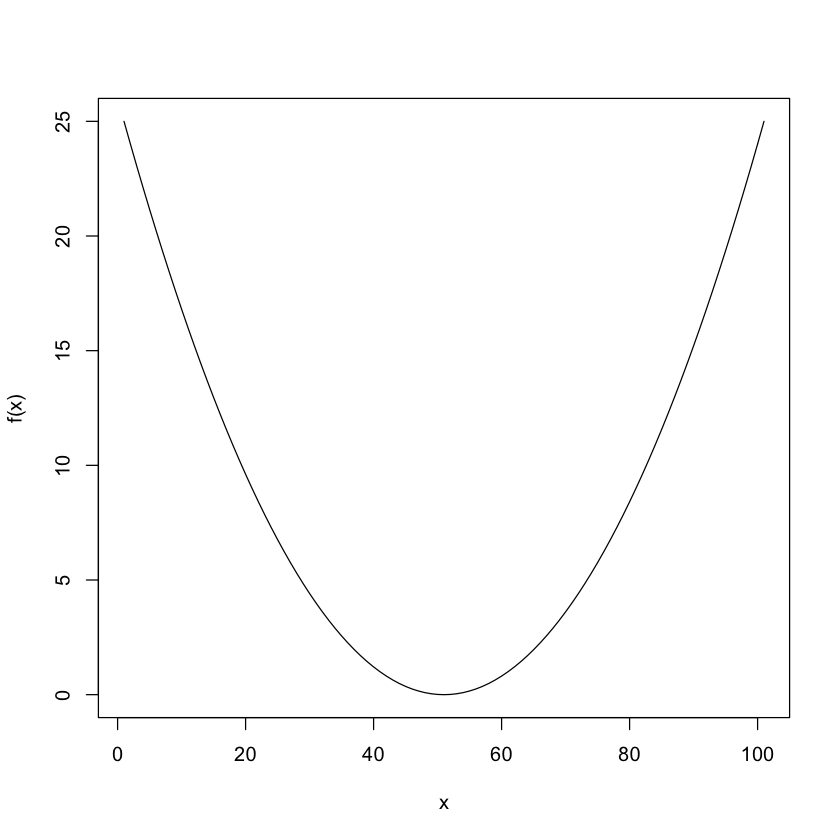

In [14]:
par(bg='white')
plot(f(x),
    xlab='x',
    type='l'
)

y=e^(-x) - 4x^2 + x + 3|x| - 3

In [16]:
f <- function(x){
    y = exp(-x) - 4 * x^2 + x + 3 * abs(x) - 3
}

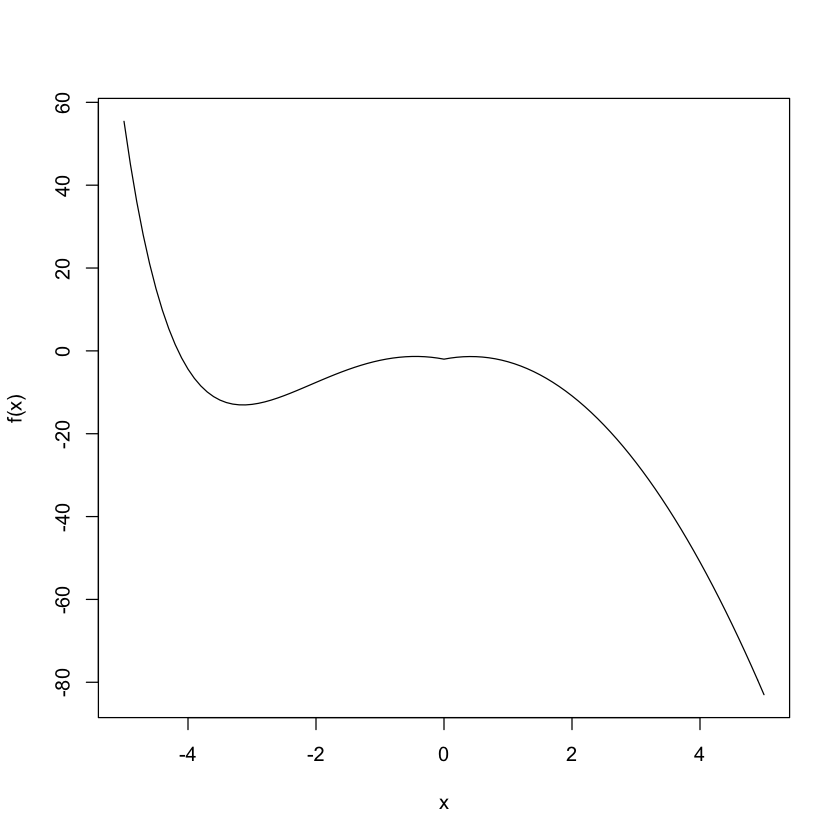

In [18]:
par(bg='white')
plot(x,f(x),
    type='l'
)

In [34]:
# y = x^2 + 2x + 3
f <- function(x){
    y = x^2 + 2 * x + 3
}

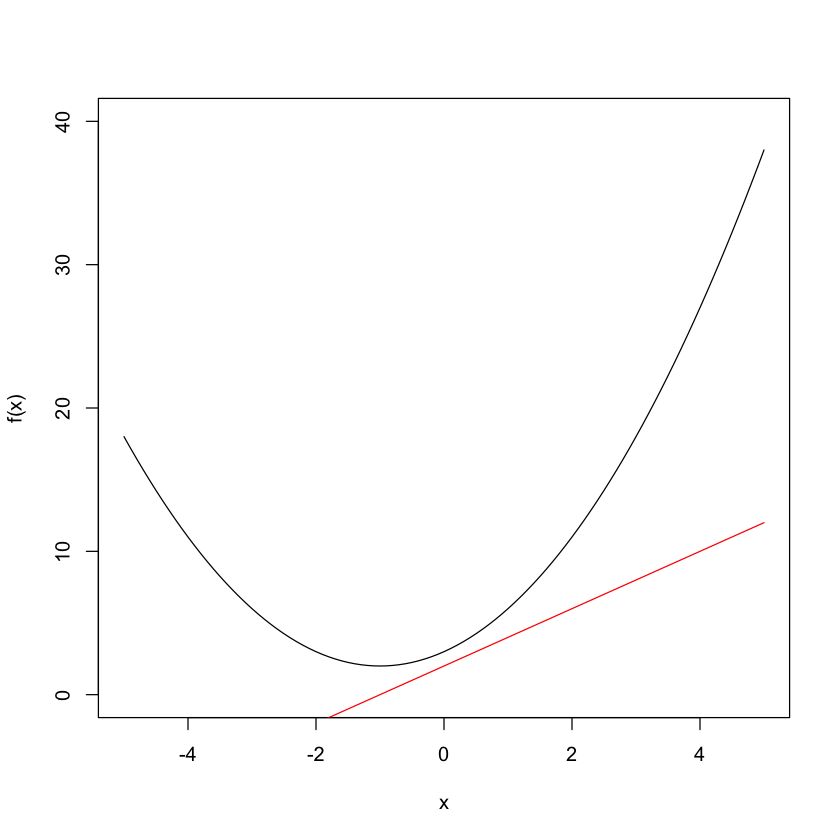

In [39]:
par(bg='white')
plot(x,f(x),
    type='l',
    ylim=c(0,40)
)
lines(x,2*x+2,
    col='red'
)